In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train/255.0, x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [5]:
model = keras.Sequential()
model.add(keras.layers.Input(x_train.shape[-1]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
model.fit(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9219


In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 0.9590


[0.1396581530570984, 0.9589999914169312]

In [8]:
y_pred = model.predict(x_test)

In [9]:
y_pred[:2]

array([[9.33363935e-07, 3.62796726e-08, 7.25831633e-05, 8.56424158e-04,
        7.40337880e-09, 1.52881730e-05, 1.50439966e-10, 9.98939455e-01,
        5.69393205e-06, 1.09575565e-04],
       [1.36002840e-04, 1.77339389e-04, 9.90826190e-01, 7.22861150e-03,
        5.37108358e-09, 1.06109201e-03, 2.51728168e-04, 5.27469757e-09,
        3.19181330e-04, 2.52874299e-09]], dtype=float32)

In [10]:
y_pred_cat = y_pred.argmax(axis=-1)
y_pred_cat

array([7, 2, 1, ..., 4, 5, 6])

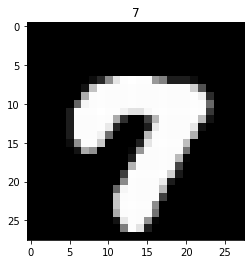

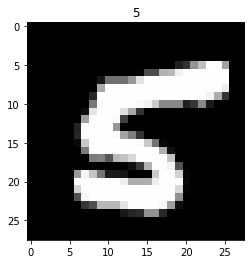

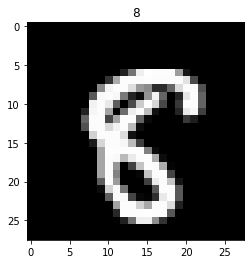

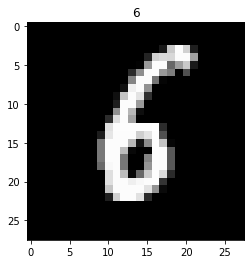

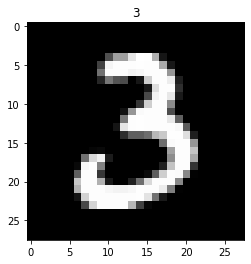

In [11]:
for i in np.random.choice(len(x_test), 5, replace=False):
    x_img = x_test[i].reshape(28, 28)
    plt.imshow(x_img, cmap="gray")
    plt.title(y_pred_cat[i])
    plt.show()

## Softmax
$$
\begin{align}
\text{softmax}(x) = \frac{\exp(x_d)}{\sum_{d=1}^D\exp(x_d)}
\end{align}
$$


In [12]:
x = tf.random.normal((5, 3))
x

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.7746542 , -0.01199313, -0.3491687 ],
       [ 2.0935361 , -1.1341677 ,  0.1509831 ],
       [ 0.40590814,  0.04399502,  0.89181566],
       [-0.56726605, -0.2148115 , -0.24763377],
       [-1.3749148 ,  0.8495705 ,  0.92021084]], dtype=float32)>

In [13]:
tf.keras.layers.Softmax()(x)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.5616703 , 0.2557672 , 0.18256241],
       [0.8453186 , 0.03351556, 0.12116589],
       [0.30102414, 0.20961604, 0.48935983],
       [0.26321498, 0.37443775, 0.36234736],
       [0.04956777, 0.45843843, 0.4919939 ]], dtype=float32)>

In [14]:
tf.keras.layers.Softmax()(x).numpy().sum(axis=-1)

array([0.99999994, 1.0000001 , 1.        , 1.0000001 , 1.0000001 ],
      dtype=float32)

In [15]:
def softmax(x):
    exp_x = tf.exp(x)
    exp_sum = tf.math.reduce_sum(exp_x, axis=-1, keepdims=True)
    return exp_x / exp_sum

In [16]:
softmax(x)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.5616703 , 0.25576726, 0.18256244],
       [0.84531856, 0.03351556, 0.12116588],
       [0.30102414, 0.20961602, 0.48935977],
       [0.26321495, 0.37443772, 0.36234733],
       [0.04956776, 0.4584384 , 0.49199387]], dtype=float32)>

Try with the Fashion MNIST dataset. Label encoding is in following table
https://github.com/zalandoresearch/fashion-mnist#labels

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step
